In [36]:
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [37]:
similarity_man_woman = model.similarity('man', 'woman')
similarity_chair_throne = model.similarity('chair', 'throne')
similarity_water_baby = model.similarity('water', 'baby')

print(f"Similarity between 'man' and 'woman': {similarity_man_woman}")
print(f"Similarity between 'chair' and 'throne': {similarity_chair_throne}")
print(f"Similarity between 'water' and 'baby': {similarity_water_baby}")

Similarity between 'man' and 'woman': 0.8860336542129517
Similarity between 'chair' and 'throne': 0.27968090772628784
Similarity between 'water' and 'baby': 0.4081036448478699


In [38]:
analogy_king = model.most_similar(positive=['king', 'woman'], negative=['man'])[0][0]
analogy_princess = model.most_similar(positive=['princess', 'man'], negative=['woman'])[0][0]
analogy_woman_child = model.most_similar(positive=['woman', 'child'], negative=['adult'])[0][0]

print(f"{analogy_king.capitalize()} is to King as Woman is to Man")
print(f"{analogy_princess.capitalize()} is to Princess as Man is to Woman")
print(f"{analogy_woman_child.capitalize()} is to a woman as a child is to an adult")

Queen is to King as Woman is to Man
Prince is to Princess as Man is to Woman
Mother is to a woman as a child is to an adult


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [2]:
messages = pd.read_csv('spam.csv', encoding='latin-1')


messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
messages.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
messages.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
messages = messages.rename(columns={'v1': 'label', 'v2': 'text'})

messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
nltk.download('stopwords')

messages['length'] = messages['text'].apply(len)

messages['label_num'] = messages['label'].map({'ham': 0, 'spam': 1})

X = messages['text']
y = messages['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)

y_pred = nb.predict(X_test_transformed)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhilgudur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

scores = cross_val_score(nb, X_train_transformed, y_train, cv=5)
print("Cross-validation scores: ", scores)

Accuracy: 0.9815
Confusion Matrix:
 [[1574   13]
 [  21  231]]
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1587
        Spam       0.95      0.92      0.93       252

    accuracy                           0.98      1839
   macro avg       0.97      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839

Cross-validation scores:  [0.97858099 0.97858099 0.98527443 0.97050938 0.97184987]


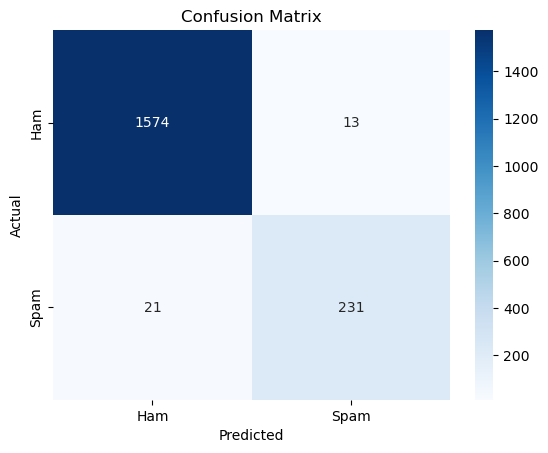

In [8]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
